**Importing Dependencies**

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

### Data Collection

In [18]:
# Import and storing the dataset in a pandas dataframe
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
# basic overview about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [19]:
# checking the number of rows and columns
df.shape

(14999, 10)

In [30]:
# Checking the number of missing values in each column
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Exploratory Data Analysis

In [31]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [46]:
# Average numbers for all columns
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


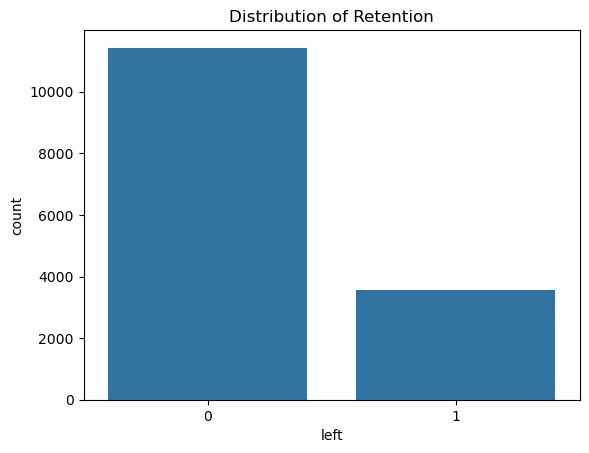

In [44]:
sns.countplot(x='left', data=df)
plt.title("Distribution of Retention")
plt.show()

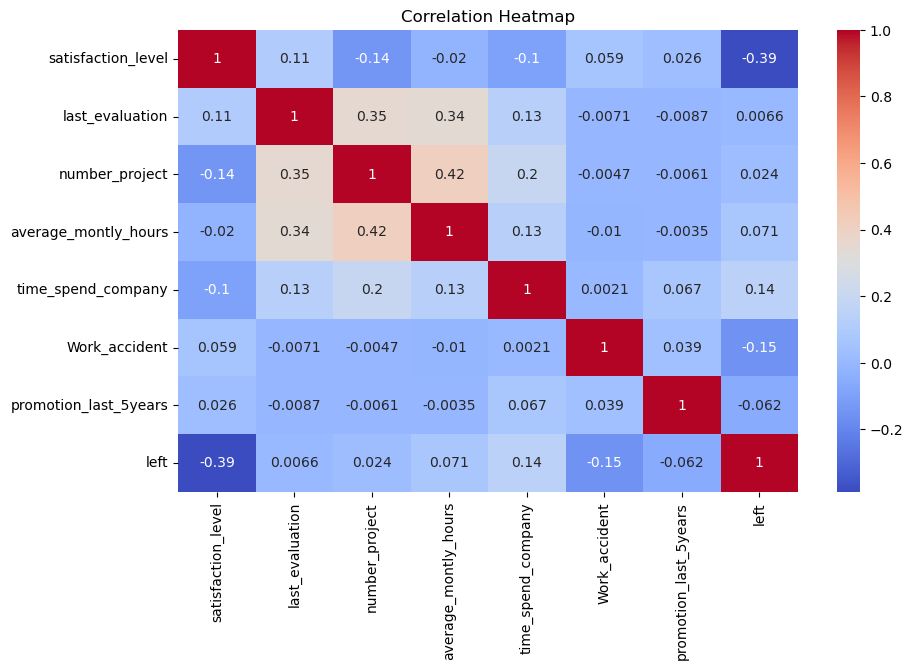

In [20]:
# Only numerical columns
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                  'average_montly_hours', 'time_spend_company',
                  'Work_accident', 'promotion_last_5years', 'left']

# Compute correlation matrix
correlation = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

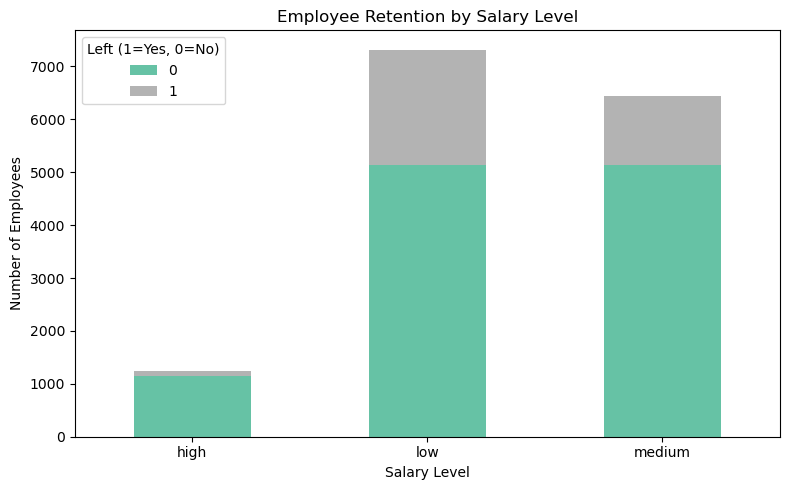

In [21]:
# Group by salary and retention
salary_retention = df.groupby(['salary', 'left']).size().unstack(fill_value=0)

# Bar plot
salary_retention.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title('Employee Retention by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Left (1=Yes, 0=No)')
plt.tight_layout()
plt.show()

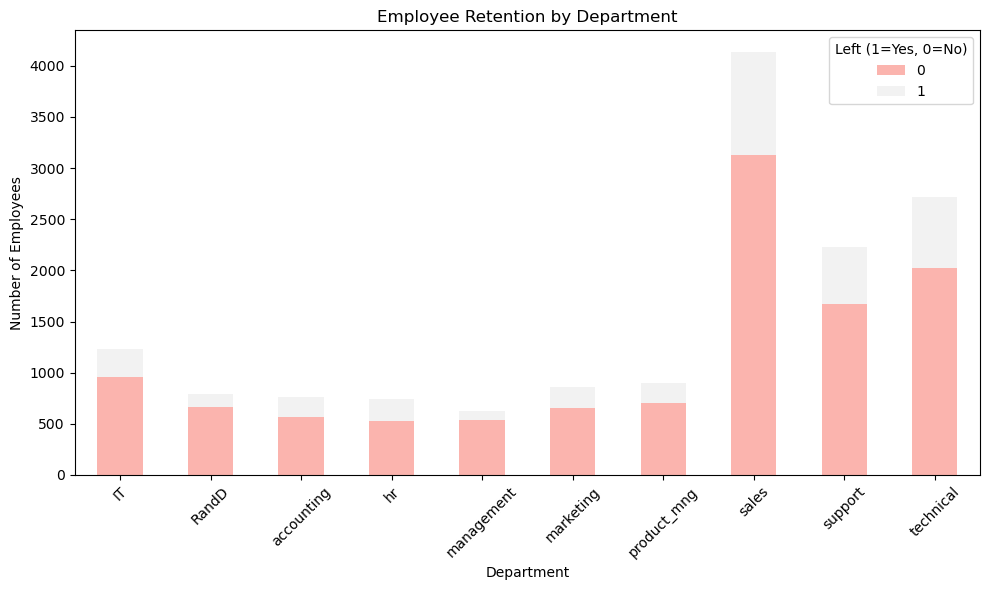

In [22]:
# Group by department and retention
department_retention = df.groupby(['Department', 'left']).size().unstack(fill_value=0)

# Bar plot
department_retention.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Left (1=Yes, 0=No)')
plt.tight_layout()
plt.show()


**Label Encoding**

In [23]:
# Define categorical columns
categorical_cols = ['Department', 'salary']

# Separate categorical and numerical data
categorical_data = df[categorical_cols]
numerical_data = df.drop(columns=categorical_cols)

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform
encoded_array = ohe.fit_transform(categorical_data)

# Get new column names
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Create DataFrame from encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)
print(encoded_df)

       Department_IT  Department_RandD  Department_accounting  ...  salary_high  salary_low  salary_medium
0                0.0               0.0                    0.0  ...          0.0         1.0            0.0
1                0.0               0.0                    0.0  ...          0.0         0.0            1.0
2                0.0               0.0                    0.0  ...          0.0         0.0            1.0
3                0.0               0.0                    0.0  ...          0.0         1.0            0.0
4                0.0               0.0                    0.0  ...          0.0         1.0            0.0
...              ...               ...                    ...  ...          ...         ...            ...
14994            0.0               0.0                    0.0  ...          0.0         1.0            0.0
14995            0.0               0.0                    0.0  ...          0.0         1.0            0.0
14996            0.0               0.

In [24]:
# Concatenate with numerical data
df_encoded = pd.concat([numerical_data, encoded_df], axis=1)

# View the resulting DataFrame
print(df_encoded.head())

   satisfaction_level  last_evaluation  number_project  ...  salary_high  salary_low  salary_medium
0                0.38             0.53               2  ...          0.0         1.0            0.0
1                0.80             0.86               5  ...          0.0         0.0            1.0
2                0.11             0.88               7  ...          0.0         0.0            1.0
3                0.72             0.87               5  ...          0.0         1.0            0.0
4                0.37             0.52               2  ...          0.0         1.0            0.0

[5 rows x 21 columns]


In [25]:
df_encoded.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

### Data Preprocessing

**Seperating Features and Target**

In [26]:
X = df_encoded.drop(['left', 'salary_medium', 'last_evaluation', 'Department_technical'], axis=1)
Y = df_encoded['left']

**Seperating Training and Test data**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=13)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(14999, 17) (12749, 17) (2250, 17)


### Model Training and Evaluation

**Model Training**

In [37]:
model = LogisticRegression(max_iter=500)

In [38]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

**Model Evaluation**

In [40]:
# prediction on training data 
X_train_prediction = model.predict(X_train)

# accuracy on the training data 
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on training data :', training_data_accuracy)

Accuracy score on training data : 0.7982586869558397


In [41]:
# prediction on training data 
X_test_prediction = model.predict(X_test)

# accuracy on the training data 
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on test data :', test_data_accuracy)

Accuracy score on test data : 0.7897777777777778
